<a href="https://colab.research.google.com/github/Mohamed-Salami/SHAI/blob/main/ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [5]:
df['BasePay'].mean()

66325.4488404877

In [6]:
df['BasePay'].max()

319275.01

In [7]:
df['BasePay'].min()

-166.01

In [8]:
df['BasePay'].std()

42764.63549525887

In [4]:
df['BasePay'].mode()

0    0.0
Name: BasePay, dtype: float64

 Handle missing data by suitable method with explain why you use it.

In [5]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [11]:
del df['Notes']

del df['Agency']

df = df[df.JobTitle != 'Not provided']

df['Benefits'].fillna(0, inplace=True)

df['Status'].fillna("Unknown", inplace=True)

df.dropna(inplace=True)

<ipython-input-11-9bcc5806a7ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Benefits'].fillna(0, inplace=True)
<ipython-input-11-9bcc5806a7ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'].fillna("Unknown", inplace=True)


In [12]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Status              0
dtype: int64

Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64


<Axes: ylabel='JobTitle'>

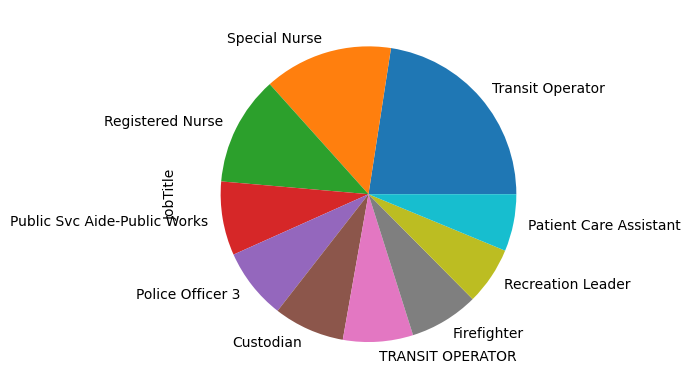

In [10]:

job_title_counts = df['JobTitle'].value_counts()[:10]
print (job_title_counts)

job_title_counts.plot(kind = 'pie')

<Axes: xlabel='JobTitle'>

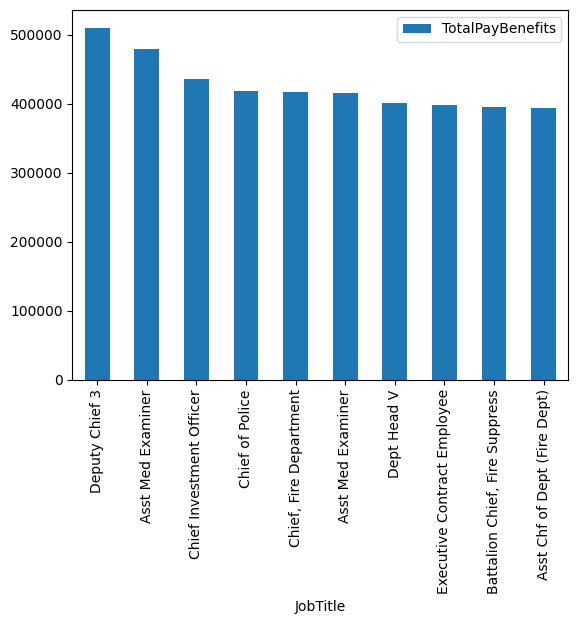

In [14]:
over_300k = df['TotalPayBenefits'] > 300000

#filter: year 2014
year_2014 = df['Year'] == 2014

#apply filters to dataframe, selecting only specific features
jobs_over_300k_in_2014 = df[over_300k & year_2014][['JobTitle','TotalPayBenefits', 'Year']]
top_10_jobs_over_300k_in_2014 = jobs_over_300k_in_2014[:10]

top_10_jobs_over_300k_in_2014.plot(x='JobTitle', y='TotalPayBenefits', kind='bar')

 Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [19]:
df.groupby('Year').mean()['BasePay']

<ipython-input-19-d6ec57df777a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Year').mean()['BasePay']


Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [20]:
df.groupby('Year').max()['BasePay']

Year
2011    294580.02
2012    302578.00
2013    319275.01
2014    318835.49
Name: BasePay, dtype: float64

In [21]:
df.groupby('Year').min()['BasePay']

Year
2011      0.00
2012   -166.01
2013     15.83
2014      0.00
Name: BasePay, dtype: float64

 Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [22]:
df['title_len'] = df['JobTitle'].apply(len)
df[['title_len','TotalPayBenefits']].corr()

,title_len,TotalPayBenefits
title_len,1.000000,-0.036669
TotalPayBenefits,-0.036669,1.000000


<ipython-input-7-95849f68aa8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


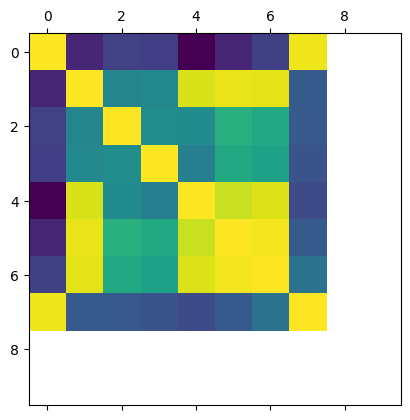

In [7]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()

# Good Luck!